There are 2500 rows and 64 columns
      Instant.Liking  q1_1.personal.opinion.of.this.Deodorant  q2_all.words  \
0           1.745081                                -0.762408     -0.129783   
1          -0.573039                                -0.087472     -0.129783   
2          -0.573039                                 0.587464     -0.129783   
3           1.745081                                -0.762408     -1.200597   
4           1.745081                                -0.762408     -0.129783   
...              ...                                      ...           ...   
2495       -0.573039                                 0.587464     -0.129783   
2496       -0.573039                                -0.087472     -1.200597   
2497        1.745081                                -0.762408      0.941032   
2498       -0.573039                                -0.087472      0.941032   
2499       -0.573039                                 1.262400      2.011846   

      q3_1.stren

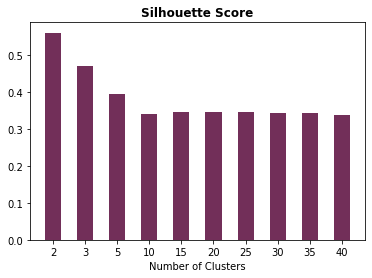

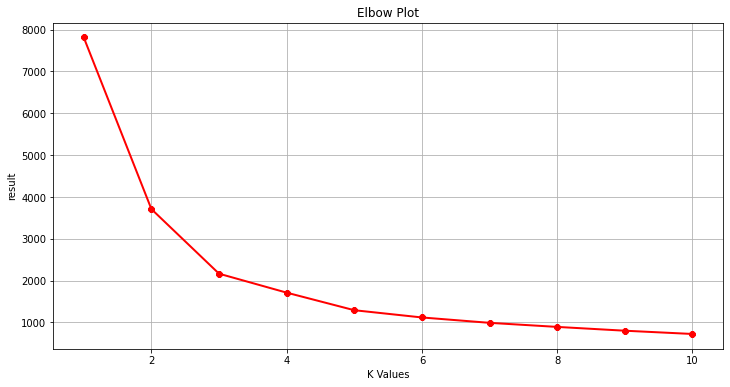

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
%matplotlib inline

#Loading DataSet
df = pd.read_csv("Data_train_reduced.csv")
Y=df['Product']

#Checking Shape
row,col = df.shape
print(f'There are {row} rows and {col} columns')

#print(df.head(10))

#Scaling the data to keep the different attributes in same range.

df.drop(['Respondent.ID','Product.ID','Product'], axis=1, inplace=True)
df[df.columns]= StandardScaler().fit_transform(df)
#df=df.iloc[:,[0,1,2,3,4]]
print(df)
df = df.fillna(df.mean())

pca_2=PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print(f'Explained variation per principal companents: {pca_2.explained_variance_ratio_}')

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

#candidate values for our no. of clusters
parameters=[2,3,5,10,15,20,25,30,35,40]

#initantiating ParameterGrid, apss number of clusters as input
parameter_grid = ParameterGrid({'n_clusters':parameters})
best_score = -1
kmeans_model = KMeans() #instantiating KMeans Model
silhouette_scores =[]

#evaluating based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p) #set current hyper parameter
    kmeans_model.fit(pca_2_result)       #fit model on df, this will find clusters based on parameter p
    ss = metrics.silhouette_score(pca_2_result, kmeans_model.labels_) #caluclate silhouette_score
    silhouette_scores += [ss]   #store all scores
    print('Parameter:', p, 'Score', ss)
    #check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid =p
        
#plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align = 'center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

#K fitting
result=[]
for k in range(1,11):
    kmeans =KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(pca_2_result)
    result.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), result, linewidth=2, color="red", marker="8")
plt.title("Elbow Plot")
plt.xlabel("K Values")
plt.ylabel("result")
plt.show()




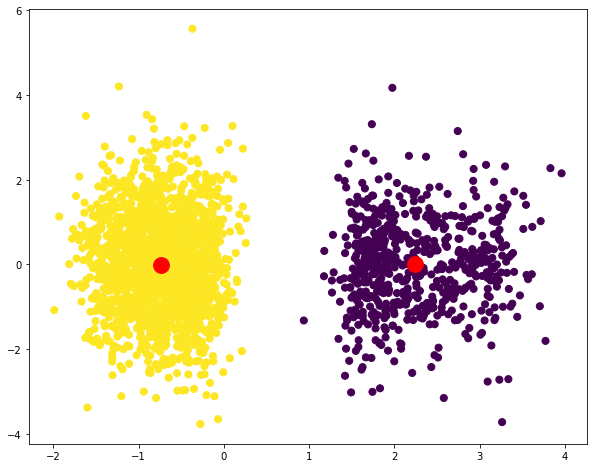

In [19]:
# following Silhouette Scores over Elbow-Method, '2' no. of clusters is selected
means = KMeans(n_clusters=2)
label=kmeans.fit_predict(pca_2_result)

plt.figure(figsize=(10,8))
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1], c=label,
            s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 250,
            marker='o',
            c='red',
            label='centroids')